# Assignment 11: Review

We will review material covered so far in this course with short questions similar to what you might expect on the Final Exam. 

First review the lecture notes. Then try to do this assignment without referring to ANY external material to simulate exam conditions.

In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as la
from toolz import reduce
from collections import Counter
import timeit

from sklearn.decomposition import NMF
from string import punctuation
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

In [2]:
%load_ext cython

**1**. (20 points)

- Generate the matrices A and B without copying and pasting.

```
A =   [[8, 7, 6, 5, 4, 3, 2, 1, 0],
       [7, 6, 5, 4, 3, 2, 1, 0, 1],
       [6, 5, 4, 3, 2, 1, 0, 1, 2],
       [5, 4, 3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 0, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3, 4, 5],
       [2, 1, 0, 1, 2, 3, 4, 5, 6],
       [1, 0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7, 8]]
```

and 

```
B =   [[0, 1, 2, 3, 4, 5, 6, 7, 8],
       [1, 0, 1, 2, 3, 4, 5, 6, 7],
       [2, 1, 0, 1, 2, 3, 4, 5, 6],
       [3, 2, 1, 0, 1, 2, 3, 4, 5],
       [4, 3, 2, 1, 0, 1, 2, 3, 4],
       [5, 4, 3, 2, 1, 0, 1, 2, 3],
       [6, 5, 4, 3, 2, 1, 0, 1, 2],
       [7, 6, 5, 4, 3, 2, 1, 0, 1],
       [8, 7, 6, 5, 4, 3, 2, 1, 0]]
```

- Is matrix multiplication of A and B commutative?
- What is the Frobenius distance between A and B?
- Find the best rank 2 approximation of A in terms of Frobenius distance.

# Q1.1
**Generate the matrices A and B without copying and pasting.**

In [3]:
A = np.fromfunction(lambda i, j: abs((i-4) + (j-4)), (9, 9), dtype = int)
print(A)

[[8 7 6 5 4 3 2 1 0]
 [7 6 5 4 3 2 1 0 1]
 [6 5 4 3 2 1 0 1 2]
 [5 4 3 2 1 0 1 2 3]
 [4 3 2 1 0 1 2 3 4]
 [3 2 1 0 1 2 3 4 5]
 [2 1 0 1 2 3 4 5 6]
 [1 0 1 2 3 4 5 6 7]
 [0 1 2 3 4 5 6 7 8]]


In [4]:
B = np.fromfunction(lambda i, j: abs(i - j), (9, 9), dtype = int)
print(B)

[[0 1 2 3 4 5 6 7 8]
 [1 0 1 2 3 4 5 6 7]
 [2 1 0 1 2 3 4 5 6]
 [3 2 1 0 1 2 3 4 5]
 [4 3 2 1 0 1 2 3 4]
 [5 4 3 2 1 0 1 2 3]
 [6 5 4 3 2 1 0 1 2]
 [7 6 5 4 3 2 1 0 1]
 [8 7 6 5 4 3 2 1 0]]


# Q1.2
**Is matrix multiplication of A and B commutative?**

yes

In [5]:
np.allclose(A @ B, B @ A)

True

# Q1.3
**What is the Frobenius distance between A and B?**

In [6]:
np.linalg.norm(A - B)

33.46640106136302

# Q1.4
**Find the best rank 2 approximation of A in terms of Frobenius distance.**

In [7]:
### perform SVD
U, s, Vt = la.svd(A)

### get the best rand 2 approximation
A_app = U[:, :2] @ np.diag(s)[:2, :2] @ Vt[:2, :]
print(A_app.shape)
print(np.round(A_app, 3))

(9, 9)
[[8.595 7.27  5.864 4.432 3.08  1.95  1.199 0.985 1.447]
 [7.27  6.157 4.955 3.715 2.532 1.532 0.852 0.63  0.985]
 [5.864 4.955 4.007 3.055 2.167 1.435 0.962 0.852 1.199]
 [4.432 3.715 3.055 2.459 1.957 1.597 1.435 1.532 1.95 ]
 [3.08  2.532 2.167 1.957 1.889 1.957 2.167 2.532 3.08 ]
 [1.95  1.532 1.435 1.597 1.957 2.459 3.055 3.715 4.432]
 [1.199 0.852 0.962 1.435 2.167 3.055 4.007 4.955 5.864]
 [0.985 0.63  0.852 1.532 2.532 3.715 4.955 6.157 7.27 ]
 [1.447 0.985 1.199 1.95  3.08  4.432 5.864 7.27  8.595]]


**2**. (20 points)

- Find the square root of 123 using the Newton-Raphson method. Write your own Netwon-Raphson function. Use a fixed number of iterations, say 10. Start with an initial guess x0=10.
- Repeat the exercise using Cython
- Time 1000 calls of the python and cython functions using `timeit.timeit`. You should see at least a 10 fold speed up with the Cython version.

# Q2.1
**Find the square root of 123 using the Newton-Raphson method. Write your own Netwon-Raphson function. Use a fixed number of iterations, say 10. Start with an initial guess x0=10.**

In [8]:
def newton_sq(x = 10, niter = 10):
    """Newton-Raphson of the square root"""
    for _ in range(niter):
        x -= (x**2 - 123) / (2 * x)
    return x

In [9]:
newton_sq()

11.090536506409418

In [10]:
123**0.5

11.090536506409418

# Q2.2
**Repeat the exercise using Cython**

In [11]:
%%cython -a

from libc.math cimport pow
def newton_sq_cython(double x = 10, int niter = 10):
    """Newton-Raphson of the square root"""
    for _ in range(niter):
        x -= (pow(x, 2) - 123) / (2 * x)
    return x

In [12]:
np.allclose(newton_sq(), newton_sq_cython())

True

# Q2.3
**Time 1000 calls of the python and cython functions using `timeit.timeit`. You should see at least a 10 fold speed up with the Cython version.**

In [13]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

4.380297852359441


In [26]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

11.737267535510323


In [27]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

6.461500771288685


In [28]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

6.553519561216494


In [29]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

13.46085838227955


In [30]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

14.517410380497745


In [32]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

5.563404468101205


In [33]:
t1

0.0031500067561864853

In [34]:
t2

0.0005662012845277786

In [35]:
t1 = timeit.timeit(lambda : newton_sq(),        number = 1000)
t2 = timeit.timeit(lambda : newton_sq_cython(), number = 1000)
print(t1 / t2)

11.375221803401608


In [36]:
t1,t2

(0.003122507594525814, 0.00027450080960989)

# -1: when repeatedly time the functions, only in about half of the cases can I get a fold of more than 10.

**3**. (30 points)

We have 3 documents

Doc 1
```
"Just the place for a Snark!" the Bellman cried,
   As he landed his crew with care;
Supporting each man on the top of the tide
   By a finger entwined in his hair.
```

Doc 2
```
"Just the place for a Snark! I have said it twice:
   That alone should encourage the crew.
Just the place for a Snark! I have said it thrice:
   What I tell you three times is true."
```

Doc 3
```
The crew was complete: it included a Boots—
   A maker of Bonnets and Hoods—
A Barrister, brought to arrange their disputes—
   And a Broker, to value their goods.
```

- Create a count matrix of the unigram and bigram counts using only standard Python libraries and convert to a DataFrame
- Use `sklearn.decomposition.NMF`  with 2 components to find a lower-dimensional feature space
- Calculate the pairwise distance matrix in the reduced feature space using cosine distance. You may use `pdist` and `squareform` from `scipy.spsatial.distance`.

In [14]:
doc1 = '''
Just the place for a Snark!" the Bellman cried,
   As he landed his crew with care;
Supporting each man on the top of the tide
   By a finger entwined in his hair.'''

doc2 = '''
"Just the place for a Snark! I have said it twice:
   That alone should encourage the crew.
Just the place for a Snark! I have said it thrice:
   What I tell you three times is true.'''

doc3 = '''
The crew was complete: it included a Boots—
   A maker of Bonnets and Hoods—
A Barrister, brought to arrange their disputes—
   And a Broker, to value their goods.

'''

# Q3.1
**Create a count matrix of the unigram and bigram counts using only standard Python libraries and convert to a DataFrame**

In [15]:
def fun_words(string):
    """process input string into bag of words"""
    table = str.maketrans(punctuation, " " * len(punctuation))
    words = string.lower().replace("—", " ").replace("-", " ").translate(table).split()
    return words

def fun_gram(words):
    """create the bag of unigram and bigram"""
    unigram = words
    bigram  = [" ".join(x) for x in zip(words[:-1], words[1:])]
    return unigram + bigram
    

def fun_count(words, colname):
    """create dataframe """
    tmp = words
    tmp = fun_words(tmp)
    tmp = fun_gram(tmp)  
    tmp = Counter(tmp)
    df = pd.DataFrame(list(tmp.values()), index = list(tmp.keys()), columns = [colname])
    return df

### construct tf for each doc
docs = [doc1, doc2, doc3]
docs = [fun_count(doc, "doc" + str(idx + 1)) for idx, doc in enumerate(docs)]

### combine the counts
mycombine = lambda df1, df2: df1.join([df2], how = "outer")
df = reduce(mycombine, docs)
df = df.fillna(0)
df = df.sort_index()
df

/opt/conda/lib/python3.5/site-packages/pandas/core/frame.py:6369: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,doc1,doc2,doc3
a,2.0,2.0,4.0
a barrister,0.0,0.0,1.0
a boots,0.0,0.0,1.0
a broker,0.0,0.0,1.0
a finger,1.0,0.0,0.0
a maker,0.0,0.0,1.0
a snark,1.0,2.0,0.0
alone,0.0,1.0,0.0
alone should,0.0,1.0,0.0
and,0.0,0.0,2.0


# Q3.2
**Use `sklearn.decomposition.NMF`  with 2 components to find a lower-dimensional feature space**

In [16]:
### initialize
model = NMF(n_components = 2, random_state = 0)

### fit transform
W  = model.fit_transform(df)
H  = model.components_
print(H.shape)
print(H)

(2, 3)
[[1.6955385  3.12742258 0.        ]
 [0.36563051 0.         2.75408708]]


# Q3.3
**Calculate the pairwise distance matrix in the reduced feature space using cosine distance. You may use `pdist` and `squareform` from `scipy.spsatial.distance`.**

In [17]:
tmp = pdist(H.T, metric = "cosine")
tmp

array([0.02247018, 0.78920282, 1.        ])

In [18]:
tmp = pdist(H.T, metric = "cosine")
squareform(tmp)

array([[0.        , 0.02247018, 0.78920282],
       [0.02247018, 0.        , 1.        ],
       [0.78920282, 1.        , 0.        ]])

**4**. (30 points)

Read the time series data in data/ts.csv into a DataFrame where the index consists of the timestamps.

- Detrend the time series by fitting a quadratic regression curve to the original data and subtracting the predicted values from the fitted model
- Plot the detrended time series and superimpose a exponentially weighted mean curve with alpha=0.2
- Plot the ACF for lags up to 30 without using the specialized ACF plots (that is, you need to create a vector of auto-correlations at each lag for the detrended data, then plot that using `matplotlib.pyplot.stem` function)

# Q4.0 
**Import data**

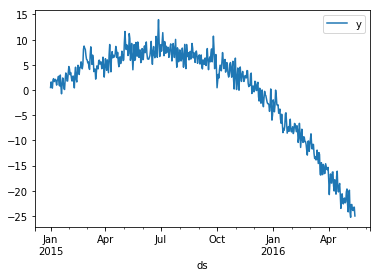

In [19]:
### import data
dat = pd.read_csv("./data/ts.csv")

### set timestamps to index
dat       = dat.copy()
index     = pd.to_datetime(dat['ds'], format = '%Y-%m').copy()
dat.index = index
dat       = dat.drop(labels = 'ds', axis = 1)

### visualize
dat.plot()
pass

# Q4.1
**Detrend the time series by fitting a quadratic regression curve to the original data and subtracting the predicted values from the fitted model**

In [20]:
### fitting a quadratic regresion curve
n = len(dat)
x = (dat.index - dat.index[0]).total_seconds()
y = dat.y.values

A = np.c_[np.ones(n), x, x**2]
b = np.linalg.solve(A.T @ A, A.T @ y)
yhat = A.dot(b)

### subtract the predicted values
df = dat.copy()
df['yhat']    = yhat
df['detrend'] = df['y'] - df['yhat']

visualize the results

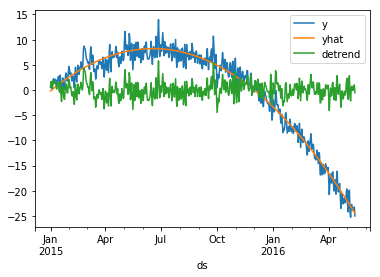

In [21]:
df.plot()
pass

# Q4.2
**Plot the detrended time series and superimpose a exponentially weighted mean curve with alpha=0.2**

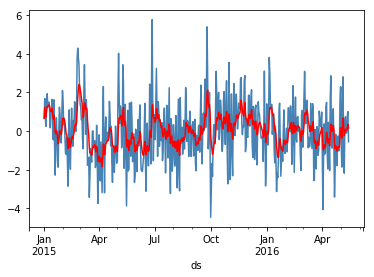

In [22]:
### exponentially weighted mean curve with alpha = 0.2
x     = df['detrend']
x_ewm = x.ewm(alpha = 0.2).mean()

### visualize: superimpose detrended time series and ewm curve
x.plot(c = "steelblue")
x_ewm.plot(c = "red")
pass

# Q4.3
**Plot the ACF for lags up to 30 without using the specialized ACF plots (that is, you need to create a vector of auto-correlations at each lag for the detrended data, then plot that using `matplotlib.pyplot.stem` function)**

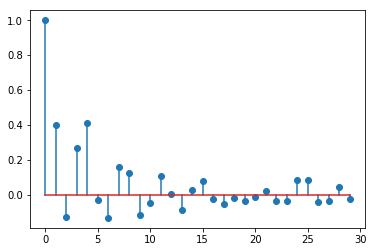

In [23]:
ac = [x.autocorr(i) for i in range(30)]
plt.stem(ac)
pass

Check the acf plots using the one in statsmodels

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

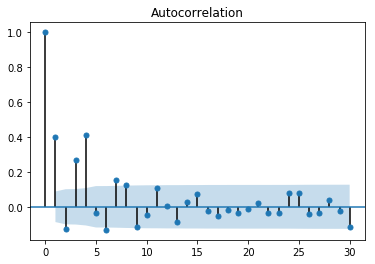

In [25]:
plot_acf(x, lags=30)
pass